# Fluxo de caixa descontado

Projeto: Abordagens de aprendizado de máquina aplicado ao reconhecimento de padrões não-lineares: Classificação do desempenho de pneus em processos de manufatura inteligente.  

Professores: Ricardo Kalid; Ricardo Uchoa

Aluno: Rodrigo Marcel Araujo Oliveira

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import *
import warnings
import matplotlib.pyplot as plt
import numpy_financial as npf

https://numpy.org/numpy-financial/latest/

# Abordagem probabilística da avaliação do fluxo de caixa

Leitura dos dados

In [2]:
pd.set_option('display.max_columns', None)
df_vpl = pd.read_excel('FCD.xlsx',sheet_name=9)
df_vpl.head()

,Unnamed: 0,Tabela FCD: fluxo de caixa descontado,Unnamed: 2,10,ano(s) que deve ser menor ou igual a 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83
0,NaN,Siglas e equações:,RV,RB = RV,IPF,IPE,IPM,IPp = IPF + IPE + IPM,RL = RT - IPt,IBC,PD&I,MKT,IBE,IBI,IT = IBC + IBE + IBI + PD&I + MKT,CV,CF,CO = CV + CF,CI = IT + CO,LO = RL - CI,LOsi = LO + IT,DV,DF,EBT,DBI,Ds,Emp,OD,SAD = Emp + OD,LAJIR = LO - (DS+SAD),LAJIRsi = LAJIR + IT,RNO,JE,LAIR = LAJIR -JE,LAIR = LAJIRsi -JE,IR,CS,OT,TT = IR+CS+OT,LL = LAIR - TT,LLsi = LL - IT,Lcp= LL / RV,DL = LL + SD,LLsI,CT = IPp + CI + SAD + JE + TT,Tempo de Retorno com base na Receita Bruta (TR...,NaN,NaN,NaN,NaN,Tempo de Retorno com base na Receita Bruta (TR...,NaN,NaN,NaN,NaN,Tempo de Retorno com base na Receita Bruta (TR...,NaN,NaN,NaN,NaN,Tempo de Retorno com base na Disponibilidade L...,NaN,NaN,NaN,Tempo de Retorno com base na Disponibilidade L...,NaN,NaN,NaN,Tempo de Retorno com base na Disponibilidade L...,NaN,NaN,NaN,Tempo de Retorno com base no Lucro Líquido: TR...,NaN,NaN,NaN,Tempo de Retorno com base no Lucro Líquido: TR...,NaN,NaN,NaN,Tempo de Retorno com base no Lucro Líquido: TR...,NaN,NaN,NaN
1,NaN,Período,Receita com vendas,Receita bruta ou receita total,Impostos proporcionais federais em relação a r...,Impostos proporcionais estaduais em relação a ...,Impostos proporcionais municipais em relação a...,"Impostos proporcionais (ISS, ICMS, IPI, PIS, C...",Receita líquida,Investimento em bens de capital,Investimento em PD&I,Investimento em marketing,Investimento em bens exauríveis,Investimento em bens intangíveis,Investimento total,Custo variável,Custo fixo,Custos operacionais,Custos e investimentos,Lucro operacional ou LAJIRDA ou EBITDA,Lucro operacional sem investimentos,Depreciação variável,Depreciação dos bens de capital,Depreciação devido a exaustão de bens tangíveis,Depreciação de bens intangíveis,Depreciações (somatório),Amortização dos empréstimos (pagamento do prin...,"OD: outras despesas, por exemplo, causas traba...",Somatório da amortização (principal) de emprés...,"Lucro antes do juros, imposto de renda e das c...",LAJIR sem investimentos,Receitas Não Operacionais,Juros de empréstimos pagos a credores,Lucro antes do imposto de renda e das contribu...,LAIR sem investimentos,"Imposto de renda, % sobre o LAIR","Contribuições sociais, % sobre o LAIR",Outras taxas ou impostos ou tributos sobre o LAIR,Total de impostos e taxas sobre o LAIR,Lucro líquido,LL sem investimentos,Lucratividade por período: lucro líquido sobre...,Disponibilidade líquida,Lucro líquido sem considerar o investimento,Custo total,RBj cenário menor TMA,COj cenário menor TMA,"RBj acumulado - Inv(CFo), menor TMA",TR-RB menor TMA aux,TR-RB menor TMA,RBj cenário intermediário,COj cenário intermediário,"RBj acumulado - Inv(CFo), intermediário",TR-RB TMA intermediário aux,TR-RB TMA intermediária,RBj cenário maior TMA,COj cenário maior TMA,"RBj acumulado - Inv(CFo), maior TMA",TR-RB maior TMA aux,TR-RB maior TMA,DLj,DLj acumulada,TR-DL menor TMA aux,TR-DL menor TMA,DLj,DLj acumulada,TR-DL TMA intermediário aux,TR-DL TMA intermediário

Tratamento dos dados e seleção das variáveis

In [3]:
pd.set_option('display.max_columns', None)
c = df_vpl[1:2]
c = pd.DataFrame(c)
c = c.transpose().reset_index()
c = c[1].to_list()

df_vpl2 = df_vpl.iloc[2:13]
df_vpl2.columns = c
df_vpl2 = df_vpl2.reset_index()
df_vpl2 = df_vpl2.iloc[:, 2:40]
df_vpl2 = df_vpl2.fillna(0)
df_vpl2

,Período,Receita com vendas,Receita bruta ou receita total,Impostos proporcionais federais em relação a receita bruta,Impostos proporcionais estaduais em relação a receita bruta,Impostos proporcionais municipais em relação a receita bruta,"Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total",Receita líquida,Investimento em bens de capital,Investimento em PD&I,Investimento em marketing,Investimento em bens exauríveis,Investimento em bens intangíveis,Investimento total,Custo variável,Custo fixo,Custos operacionais,Custos e investimentos,Lucro operacional ou LAJIRDA ou EBITDA,Lucro operacional sem investimentos,Depreciação variável,Depreciação dos bens de capital,Depreciação devido a exaustão de bens tangíveis,Depreciação de bens intangíveis,Depreciações (somatório),Amortização dos empréstimos (pagamento do principal),"OD: outras despesas, por exemplo, causas trabalhistas, multas comerciais etc.",Somatório da amortização (principal) de empréstimos e outros dedutíveis do IR,"Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)",LAJIR sem investimentos,Receitas Não Operacionais,Juros de empréstimos pagos a credores,Lucro antes do imposto de renda e das contribuições sociais (LAIR),LAIR sem investimentos,"Imposto de renda, % sobre o LAIR","Contribuições sociais, % sobre o LAIR",Outras taxas ou impostos ou tributos sobre o LAIR,Total de impostos e taxas sobre o LAIR
0,0,0,0,0,0,0,0,0,57600,0,0,0,150000,207600,36288.0,9.075000e+05,9.437880e+05,1.151388e+06,-1.151388e+06,-9.437880e+05,0,0,0,30000,30000,0.000000,47189.400000,47189.400000,-1.228577e+06,-1.020977e+06,0,0.0000,-1.228577e+06,-1.020977e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,1,2400000,2400000,192000,60000,0,252000,2148000,0,7518,6444,2148,71500,87610,65318.4,9.022860e+05,9.676044e+05,1.055214e+06,1.092786e+06,1.180396e+06,0,11520,0,4000,15520,0.000000,48380.220000,48380.220000,1.028885e+06,1.116495e+06,0,0.0000,1.028885e+06,1.116495e+06,1.028885e+05,7.716640e+04,51444.269000,2.314992e+05
2,2,4800000,4800000,384000,120000,0,504000,4296000,0,15036,12888,4296,71500,103720,130636.8,1.038120e+06,1.168757e+06,1.272477e+06,3.023523e+06,3.127243e+06,0,11520,0,4000,15520,56412.055337,58437.855000,114849.910337,2.893153e+06,2.996873e+06,0,19080.0000,2.874073e+06,2.977793e+06,2.874073e+05,2.155555e+05,143703.649483,6.466664e+05
3,3,7200000,7200000,576000,180000,0,756000,6444000,0,22554,19332,6444,71500,119830,195955.2,1.146705e+06,1.342660e+06,1.462490e+06,4.981510e+06,5.101340e+06,0,11520,0,4000,15520,59796.778937,67132.995300,126929.774237,4.839060e+06,4.958890e+06,0,15695.2764,4.823365e+06,4.943195e+06,4.823365e+05,3.617524e+05,241168.252168,1.085257e+06
4,4,9600000,9600000,768000,240000,0,1008000,8592000,0,30072,25776,8592,71500,135940,261273.6,1.225438e+06,1.486711e+06,1.622651e+06,6.969349e+06,7.105289e+06,0,11520,0,4000,15520,63384.585737,74335.560012,137720.145749,6.816109e+06,6.952049e+06,0,12107.4696,6.804001e+06,6.939941e+06,6.804001e+05,5.103001e+05,340200.059221,1.530900e+06
5,5,12000000,12000000,960000,300000,0,1260000,10740000,0,37590,32220,10740,71500,152050,326592.0,1.609046e+06,1.935638e+06,2.087688e+06,8.652312e+06,8.804362e+06,0,11520,0,4000,15520,67187.661137,96781.917612,163969.578749,8.472822e+06,8.624872e+06,0,8304.3942,8.464518e+06,8.616568e+06,8.464518e+05,6.348388e+05,423225.883740,1.904516e+06
6,6,14400000,14400000,1152000,360000,0,1512000,12888000,0,45108,38664,12888,71500,168160,391910.4,1.744497e+06,2.136407e+06,2.304567e+06,1.058343e+07,1.075159e+07,0,11520,0,4000,15520,71218.910000,106820.363964,178039.273964,1.038987e+07,1.055803e+07,0,4273.1346,1.038560e+07,1.055376e+07,1.038560e+06,7.789200e+05,519280.015607,2.336760e+06
7,7,16800000,16800000,1344000,420000,0,1764000,15036000,0,52626,45108,15036,71500,184270,457228.8,1.934190e+06,2.391419e+06,2.575689e+06,1.246031e+07,1.264458e+07,0,11520,0,4000,15520,0.000000,119570.960844,119570.960844,1.232522e+07,1.250949e+07,0,0.0000,1.232522e+07,1.250949e+07,1.23

Premissas do fluxo de caixa

In [4]:
Inflacao = 0.0
Quantidade_de_períodos_cobertos_pelo_capital_de_giro = 1.0
Impostos_proporcionais_federais = 8.0
Impostos_proporcionais_estaduais =	2.5
Impostos_proporcionais_municipais = 0.0
Investimento_maximo_em_PDI = 10.0
Investimento_maximo_em_marketing =5.0
Outras_despesas_por_exemplo_causas_trabalhistas_multas = 5.0
Taxa_de_imposto_de_renda_sobre_o_LAIR = 10.0
Contribuicao_social_sobre_o_LAIR = 7.5
Outras_taxas_ou_impostos_ou_tributos_sobre_o_LAIR =	5.0
Tempo_de_retorno_minimo	= 3.0
Emprestimo_para_capital_de_giro =200000.00
Emprestimo_para_investimento_em_bens_de_capital = 100000.00
Quantidade_de_periodos_para_quitar_o_emprestimo = 5
Periodo_de_carencia_para_pagamento_do_juros_do_emprestimo = 2
Periodo_de_carencia_para_pagamento_do_principal_do_emprestimo =	2
Taxa_de_juros_inclue_a_inflação = 6.0

Calculos do fluxo de caixa

In [5]:
def impostos_periodo(lair, taxa, periodo):
    if periodo>0:
        return lair*taxa
    else:
        return 0   

In [6]:
df_vpl2['Receita bruta ou receita total'] = df_vpl2['Receita com vendas']
df_vpl2['Impostos proporcionais federais em relação a receita bruta'] = df_vpl2['Receita com vendas']*Impostos_proporcionais_federais/100
df_vpl2['Impostos proporcionais estaduais em relação a receita bruta'] = df_vpl2['Receita com vendas']*Impostos_proporcionais_estaduais/100
df_vpl2['Impostos proporcionais municipais em relação a receita bruta'] = df_vpl2['Receita com vendas']* Impostos_proporcionais_municipais/100
df_vpl2['Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total'] = df_vpl2['Impostos proporcionais federais em relação a receita bruta']  + df_vpl2['Impostos proporcionais estaduais em relação a receita bruta'] + df_vpl2['Impostos proporcionais municipais em relação a receita bruta']
df_vpl2['Receita líquida'] = df_vpl2['Receita bruta ou receita total'] -  df_vpl2['Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total']
df_vpl2['Investimento em PD&I'] = df_vpl2['Receita líquida']*0.0035
df_vpl2['Investimento em marketing'] =df_vpl2['Receita líquida']*0.003
df_vpl2['Investimento em bens exauríveis'] =df_vpl2['Receita líquida']*0.001
df_vpl2['Investimento total'] = df_vpl2['Investimento em PD&I']  + df_vpl2['Investimento em marketing'] + df_vpl2['Investimento em bens exauríveis'] + df_vpl2['Investimento em bens intangíveis'] + df_vpl2['Investimento em bens de capital']
df_vpl2['Custos e investimentos'] = df_vpl2['Investimento total'] + df_vpl2['Custos operacionais']
df_vpl2['Lucro operacional ou LAJIRDA ou EBITDA'] = df_vpl2['Receita líquida'] - df_vpl2['Custos e investimentos']
df_vpl2['Lucro operacional sem investimentos'] = df_vpl2['Lucro operacional ou LAJIRDA ou EBITDA'] + df_vpl2['Investimento total']

df_vpl2['Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)'] = df_vpl2['Lucro operacional ou LAJIRDA ou EBITDA'] - df_vpl2['Somatório da amortização (principal) de empréstimos e outros dedutíveis do IR'] - df_vpl2['Depreciações (somatório)']

df_vpl2['LAJIR sem investimentos'] = df_vpl2['Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)'] + df_vpl2['Investimento total'] 
df_vpl2['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'] = df_vpl2['Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)']+df_vpl2['Receitas Não Operacionais']-df_vpl2['Juros de empréstimos pagos a credores']
df_vpl2['LAIR sem investimentos'] = df_vpl2['LAJIR sem investimentos']-df_vpl2['Juros de empréstimos pagos a credores']

df_vpl2['Imposto de renda,  % sobre o LAIR'] = df_vpl2.apply(lambda row: impostos_periodo(row['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'], Taxa_de_imposto_de_renda_sobre_o_LAIR/100, row['Período']), axis=1)
df_vpl2['Contribuições sociais, % sobre o LAIR'] = df_vpl2.apply(lambda row: impostos_periodo(row['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'], Contribuicao_social_sobre_o_LAIR/100, row['Período']), axis=1)
df_vpl2['Outras taxas ou impostos ou tributos sobre o LAIR'] = df_vpl2.apply(lambda row: impostos_periodo(row['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'], Outras_taxas_ou_impostos_ou_tributos_sobre_o_LAIR/100, row['Período']), axis=1)

df_vpl2['Total de impostos e taxas sobre o LAIR'] = df_vpl2['Imposto de renda,  % sobre o LAIR'] + df_vpl2['Contribuições sociais, % sobre o LAIR'] + df_vpl2['Outras taxas ou impostos ou tributos sobre o LAIR']
df_vpl2['Lucro líquido'] = df_vpl2['Lucro antes do imposto de renda e das contribuições sociais (LAIR)']-df_vpl2['Total de impostos e taxas sobre o LAIR']



In [7]:
pd.set_option('display.max_columns', None)
df_vpl2


,Período,Receita com vendas,Receita bruta ou receita total,Impostos proporcionais federais em relação a receita bruta,Impostos proporcionais estaduais em relação a receita bruta,Impostos proporcionais municipais em relação a receita bruta,"Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total",Receita líquida,Investimento em bens de capital,Investimento em PD&I,Investimento em marketing,Investimento em bens exauríveis,Investimento em bens intangíveis,Investimento total,Custo variável,Custo fixo,Custos operacionais,Custos e investimentos,Lucro operacional ou LAJIRDA ou EBITDA,Lucro operacional sem investimentos,Depreciação variável,Depreciação dos bens de capital,Depreciação devido a exaustão de bens tangíveis,Depreciação de bens intangíveis,Depreciações (somatório),Amortização dos empréstimos (pagamento do principal),"OD: outras despesas, por exemplo, causas trabalhistas, multas comerciais etc.",Somatório da amortização (principal) de empréstimos e outros dedutíveis do IR,"Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)",LAJIR sem investimentos,Receitas Não Operacionais,Juros de empréstimos pagos a credores,Lucro antes do imposto de renda e das contribuições sociais (LAIR),LAIR sem investimentos,"Imposto de renda, % sobre o LAIR","Contribuições sociais, % sobre o LAIR",Outras taxas ou impostos ou tributos sobre o LAIR,Total de impostos e taxas sobre o LAIR,Lucro líquido
0,0,0,0,0.0,0.0,0.0,0.0,0.0,57600,0.0,0.0,0.0,150000,207600.0,36288.0,9.075000e+05,9.437880e+05,1.151388e+06,-1.151388e+06,-9.437880e+05,0,0,0,30000,30000,0.000000,47189.400000,47189.400000,-1.228577e+06,-1.020977e+06,0,0.0000,-1.228577e+06,-1.020977e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.228577e+06
1,1,2400000,2400000,192000.0,60000.0,0.0,252000.0,2148000.0,0,7518.0,6444.0,2148.0,71500,87610.0,65318.4,9.022860e+05,9.676044e+05,1.055214e+06,1.092786e+06,1.180396e+06,0,11520,0,4000,15520,0.000000,48380.220000,48380.220000,1.028885e+06,1.116495e+06,0,0.0000,1.028885e+06,1.116495e+06,1.028885e+05,7.716640e+04,51444.269000,2.314992e+05,7.973862e+05
2,2,4800000,4800000,384000.0,120000.0,0.0,504000.0,4296000.0,0,15036.0,12888.0,4296.0,71500,103720.0,130636.8,1.038120e+06,1.168757e+06,1.272477e+06,3.023523e+06,3.127243e+06,0,11520,0,4000,15520,56412.055337,58437.855000,114849.910337,2.893153e+06,2.996873e+06,0,19080.0000,2.874073e+06,2.977793e+06,2.874073e+05,2.155555e+05,143703.649483,6.466664e+05,2.227407e+06
3,3,7200000,7200000,576000.0,180000.0,0.0,756000.0,6444000.0,0,22554.0,19332.0,6444.0,71500,119830.0,195955.2,1.146705e+06,1.342660e+06,1.462490e+06,4.981510e+06,5.101340e+06,0,11520,0,4000,15520,59796.778937,67132.995300,126929.774237,4.839060e+06,4.958890e+06,0,15695.2764,4.823365e+06,4.943195e+06,4.823365e+05,3.617524e+05,241168.252168,1.085257e+06,3.738108e+06
4,4,9600000,9600000,768000.0,240000.0,0.0,1008000.0,8592000.0,0,30072.0,25776.0,8592.0,71500,135940.0,261273.6,1.225438e+06,1.486711e+06,1.622651e+06,6.969349e+06,7.105289e+06,0,11520,0,4000,15520,63384.585737,74335.560012,137720.145749,6.816109e+06,6.952049e+06,0,12107.4696,6.804001e+06,6.939941e+06,6.804001e+05,5.103001e+05,340200.059221,1.530900e+06,5.273101e+06
5,5,12000000,12000000,960000.0,300000.0,0.0,1260000.0,10740000.0,0,37590.0,32220.0,10740.0,71500,152050.0,326592.0,1.609046e+06,1.935638e+06,2.087688e+06,8.652312e+06,8.804362e+06,0,11520,0,4000,15520,67187.661137,96781.917612,163969.578749,8.472822e+06,8.624872e+06,0,8304.3942,8.464518e+06,8.616568e+06,8.464518e+05,6.348388e+05,423225.883740,1.904516e+06,6.560001e+06
6,6,14400000,14400000,1152000.0,360000.0,0.0,1512000.0,12888000.0,0,45108.0,38664.0,12888.0,71500,168160.0,391910.4,1.744497e+06,2.136407e+06,2.304567e+06,1.058343e+07,1.075159e+07,0,11520,0,4000,15520,71218.910000,106820.363964,178039.273964,1.038987e+07,1.055803e+07,0,4273.1346,1.038560e+07,1.055376e+07,1.038560e+06,7.789200e+05,519280.015607,2.336760e+06,8.048840e+06
7,7,16800000,16800000,1344000.0,420000.0,0.0,1764000.0

Distribuição da taxa de crescimento da receita

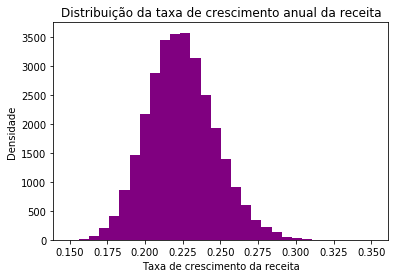

In [70]:
n_interacoes = 30000
taxa_cresc = np.random.lognormal(mean = -3/2, sigma=1/10, size=n_interacoes)# np.random.normal(loc=0.1, scale=0.01, size=n_interacoes)
plt.hist(taxa_cresc, bins=30,  color='purple')
plt.xlabel('Taxa de crescimento da receita')
plt.ylabel('Densidade')
plt.title('Distribuição da taxa de crescimento anual da receita')
plt.show()

In [71]:
print("devio padrão: ", stdev(taxa_cresc))
print("média: ", mean(taxa_cresc))
print("mediana: ", median(taxa_cresc))

devio padrão:  0.022417271354659093
média:  0.2241928651799217
mediana:  0.2231732625019075


Distribuição da receita

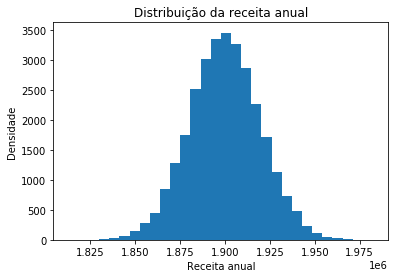

In [10]:
shape, scale = 9500, 200  # mean=4, std=2*sqrt(2)
receita_dist = np.random.gamma(shape, scale, n_interacoes)
plt.hist(receita_dist, bins=30)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Receita anual')
plt.ylabel('Densidade')
plt.title('Distribuição da receita anual')
plt.show()

In [11]:
print("devio padrão: ", stdev(receita_dist))
print("média: ", mean(receita_dist))
print("mediana: ", median(receita_dist))

devio padrão:  19577.20960662543
média:  1900021.8502075141
mediana:  1900022.2389936452


Distribuição da TMA

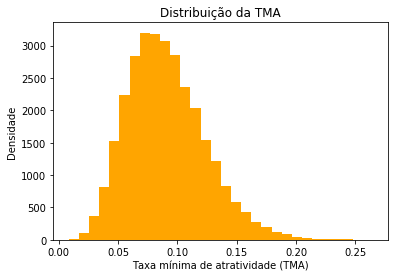

In [12]:
tma_dist = np.random.beta(7, 70, size=n_interacoes)
plt.hist(tma_dist, bins=30, color='orange')
plt.xlabel('Taxa mínima de atratividade (TMA)')
plt.ylabel('Densidade')
plt.title('Distribuição da TMA')
plt.show()

In [13]:
print("devio padrão: ", stdev(tma_dist))
print("média: ", mean(tma_dist))
print("mediana: ", median(tma_dist))

devio padrão:  0.032493503663874546
média:  0.09077786842861049
mediana:  0.08741939235439455


In [14]:
receita_inicial = mean(receita_dist)
taxa_cresc_receita = mean(taxa_cresc)
tma = mean(tma_dist)

Receita

In [15]:
warnings.filterwarnings('ignore')

df_vpl2['Receita com vendas'].iloc[1] = receita_inicial

for periodo in range(2, 11):
    df_vpl2['Receita com vendas'].iloc[periodo] = (df_vpl2['Receita com vendas'].iloc[periodo - 1]) * (1 + taxa_cresc_receita) 

df_vpl2

,Período,Receita com vendas,Receita bruta ou receita total,Impostos proporcionais federais em relação a receita bruta,Impostos proporcionais estaduais em relação a receita bruta,Impostos proporcionais municipais em relação a receita bruta,"Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total",Receita líquida,Investimento em bens de capital,Investimento em PD&I,Investimento em marketing,Investimento em bens exauríveis,Investimento em bens intangíveis,Investimento total,Custo variável,Custo fixo,Custos operacionais,Custos e investimentos,Lucro operacional ou LAJIRDA ou EBITDA,Lucro operacional sem investimentos,Depreciação variável,Depreciação dos bens de capital,Depreciação devido a exaustão de bens tangíveis,Depreciação de bens intangíveis,Depreciações (somatório),Amortização dos empréstimos (pagamento do principal),"OD: outras despesas, por exemplo, causas trabalhistas, multas comerciais etc.",Somatório da amortização (principal) de empréstimos e outros dedutíveis do IR,"Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)",LAJIR sem investimentos,Receitas Não Operacionais,Juros de empréstimos pagos a credores,Lucro antes do imposto de renda e das contribuições sociais (LAIR),LAIR sem investimentos,"Imposto de renda, % sobre o LAIR","Contribuições sociais, % sobre o LAIR",Outras taxas ou impostos ou tributos sobre o LAIR,Total de impostos e taxas sobre o LAIR,Lucro líquido
0,0,0.000000e+00,0,0.0,0.0,0.0,0.0,0.0,57600,0.0,0.0,0.0,150000,207600.0,36288.0,9.075000e+05,9.437880e+05,1.151388e+06,-1.151388e+06,-9.437880e+05,0,0,0,30000,30000,0.000000,47189.400000,47189.400000,-1.228577e+06,-1.020977e+06,0,0.0000,-1.228577e+06,-1.020977e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.228577e+06
1,1,1.900022e+06,2400000,192000.0,60000.0,0.0,252000.0,2148000.0,0,7518.0,6444.0,2148.0,71500,87610.0,65318.4,9.022860e+05,9.676044e+05,1.055214e+06,1.092786e+06,1.180396e+06,0,11520,0,4000,15520,0.000000,48380.220000,48380.220000,1.028885e+06,1.116495e+06,0,0.0000,1.028885e+06,1.116495e+06,1.028885e+05,7.716640e+04,51444.269000,2.314992e+05,7.973862e+05
2,2,2.089957e+06,4800000,384000.0,120000.0,0.0,504000.0,4296000.0,0,15036.0,12888.0,4296.0,71500,103720.0,130636.8,1.038120e+06,1.168757e+06,1.272477e+06,3.023523e+06,3.127243e+06,0,11520,0,4000,15520,56412.055337,58437.855000,114849.910337,2.893153e+06,2.996873e+06,0,19080.0000,2.874073e+06,2.977793e+06,2.874073e+05,2.155555e+05,143703.649483,6.466664e+05,2.227407e+06
3,3,2.298879e+06,7200000,576000.0,180000.0,0.0,756000.0,6444000.0,0,22554.0,19332.0,6444.0,71500,119830.0,195955.2,1.146705e+06,1.342660e+06,1.462490e+06,4.981510e+06,5.101340e+06,0,11520,0,4000,15520,59796.778937,67132.995300,126929.774237,4.839060e+06,4.958890e+06,0,15695.2764,4.823365e+06,4.943195e+06,4.823365e+05,3.617524e+05,241168.252168,1.085257e+06,3.738108e+06
4,4,2.528685e+06,9600000,768000.0,240000.0,0.0,1008000.0,8592000.0,0,30072.0,25776.0,8592.0,71500,135940.0,261273.6,1.225438e+06,1.486711e+06,1.622651e+06,6.969349e+06,7.105289e+06,0,11520,0,4000,15520,63384.585737,74335.560012,137720.145749,6.816109e+06,6.952049e+06,0,12107.4696,6.804001e+06,6.939941e+06,6.804001e+05,5.103001e+05,340200.059221,1.530900e+06,5.273101e+06
5,5,2.781464e+06,12000000,960000.0,300000.0,0.0,1260000.0,10740000.0,0,37590.0,32220.0,10740.0,71500,152050.0,326592.0,1.609046e+06,1.935638e+06,2.087688e+06,8.652312e+06,8.804362e+06,0,11520,0,4000,15520,67187.661137,96781.917612,163969.578749,8.472822e+06,8.624872e+06,0,8304.3942,8.464518e+06,8.616568e+06,8.464518e+05,6.348388e+05,423225.883740,1.904516e+06,6.560001e+06
6,6,3.059512e+06,14400000,1152000.0,360000.0,0.0,1512000.0,12888000.0,0,45108.0,38664.0,12888.0,71500,168160.0,391910.4,1.744497e+06,2.136407e+06,2.304567e+06,1.058343e+07,1.075159e+07,0,11520,0,4000,15520,71218.910000,106820.363964,178039.273964,1.038987e+07,1.055803e+07,0,4273.1346,1.038560e+07,1.055376e+07,1.038560e+06,7.789200e+05,519280.015607,2.336760e+06,8.048840e+06
7,7,3.365355e+0

### Função automatizada do fluxo de caixa

In [72]:
def impostos_periodo(lair, taxa, periodo):
    if periodo>0:
        return lair*taxa
    else:
        return 0   
        

def VPL_FCD(data, n_interacoes):
    
    # Calculando fluxo de caixa
    dist_vpl= list()
    dist_tir = list()
    
    taxa_cresc = np.random.lognormal(mean = -3/2, sigma=1/10, size=n_interacoes) #np.random.normal(loc=0.1, scale=0.01, size=n_interacoes)

    shape, scale = 9500, 200  # mean=2*shape, std=2*sqrt(scale)
    receita_dist = np.random.gamma(shape, scale, n_interacoes)

    tma_dist = np.random.beta(7, 70, size=n_interacoes)


    receita_inicial = mean(receita_dist)
    taxa_cresc_receita = mean(taxa_cresc)
    tma = mean(tma_dist)


    for i in range(n_interacoes):

        data['Receita com vendas'].iloc[1] = receita_inicial

        for periodo in range(2, 11):
            data['Receita com vendas'].iloc[periodo] = (data['Receita com vendas'].iloc[periodo - 1]) * (1 + taxa_cresc[i]) 

        Impostos_proporcionais_federais = 8.0/100
        Impostos_proporcionais_estaduais =	2.5/100
        Impostos_proporcionais_municipais = 0.0/100
        Taxa_de_imposto_de_renda_sobre_o_LAIR = 10.0/100
        Contribuicao_social_sobre_o_LAIR = 7.5/100
        Outras_taxas_ou_impostos_ou_tributos_sobre_o_LAIR =	5.0/100

        data['Receita bruta ou receita total'] = data['Receita com vendas']
        data['Impostos proporcionais federais em relação a receita bruta'] = data['Receita com vendas']*Impostos_proporcionais_federais
        data['Impostos proporcionais estaduais em relação a receita bruta'] = data['Receita com vendas']*Impostos_proporcionais_estaduais
        data['Impostos proporcionais municipais em relação a receita bruta'] = data['Receita com vendas']* Impostos_proporcionais_municipais
        data['Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total'] = data['Impostos proporcionais federais em relação a receita bruta']  + data['Impostos proporcionais estaduais em relação a receita bruta'] + data['Impostos proporcionais municipais em relação a receita bruta']
        data['Receita líquida'] = data['Receita bruta ou receita total'] -  data['Impostos proporcionais (ISS, ICMS, IPI, PIS, CONFINS etc.) total']
        data['Investimento em PD&I'] = data['Receita líquida']*0.0035
        data['Investimento em marketing'] =data['Receita líquida']*0.003
        data['Investimento em bens exauríveis'] =data['Receita líquida']*0.001
        data['Investimento total'] = data['Investimento em PD&I']  + data['Investimento em marketing'] + data['Investimento em bens exauríveis'] + data['Investimento em bens intangíveis'] + data['Investimento em bens de capital']
        data['Custos e investimentos'] = data['Investimento total'] + data['Custos operacionais']
        data['Lucro operacional ou LAJIRDA ou EBITDA'] = data['Receita líquida'] - data['Custos e investimentos']
        data['Lucro operacional sem investimentos'] = data['Lucro operacional ou LAJIRDA ou EBITDA'] + data['Investimento total']

        data['Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)'] = data['Lucro operacional ou LAJIRDA ou EBITDA'] - data['Somatório da amortização (principal) de empréstimos e outros dedutíveis do IR'] - data['Depreciações (somatório)']

        data['LAJIR sem investimentos'] = data['Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)'] + data['Investimento total'] 
        data['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'] = data['Lucro antes do juros, imposto de renda e das contribuições sociais (LAJIR)']+data['Receitas Não Operacionais']-data['Juros de empréstimos pagos a credores']
        data['LAIR sem investimentos'] = data['LAJIR sem investimentos']-data['Juros de empréstimos pagos a credores']

        data['Imposto de renda,  % sobre o LAIR'] = data.apply(lambda row: impostos_periodo(row['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'], Taxa_de_imposto_de_renda_sobre_o_LAIR, row['Período']), axis=1)
        data['Contribuições sociais, % sobre o LAIR'] = data.apply(lambda row: impostos_periodo(row['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'], Contribuicao_social_sobre_o_LAIR, row['Período']), axis=1)
        data['Outras taxas ou impostos ou tributos sobre o LAIR'] = data.apply(lambda row: impostos_periodo(row['Lucro antes do imposto de renda e das contribuições sociais (LAIR)'], Outras_taxas_ou_impostos_ou_tributos_sobre_o_LAIR, row['Período']), axis=1)

        data['Total de impostos e taxas sobre o LAIR'] = data['Imposto de renda,  % sobre o LAIR'] + data['Contribuições sociais, % sobre o LAIR'] + data['Outras taxas ou impostos ou tributos sobre o LAIR']
        data['Lucro líquido'] = data['Lucro antes do imposto de renda e das contribuições sociais (LAIR)']-data['Total de impostos e taxas sobre o LAIR']

        vpl = npf.npv(float(tma), data['Lucro líquido'])
        flx= np.array(list(data['Lucro líquido']))
        tir = npf.irr(flx)

        dist_vpl.append(vpl)
        dist_tir.append(tir)
    
    return dist_vpl, dist_tir

In [73]:
warnings.filterwarnings('ignore')

vpl_dist, tir_dist = VPL_FCD(df_vpl2, n_interacoes = 30000)

devio padrão:  2168423.3948924905
média:  9796681.927745767
mediana:  9567978.8803814


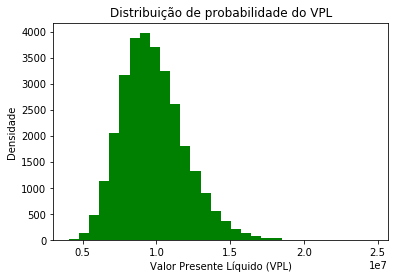

In [75]:
warnings.filterwarnings('ignore')

print("devio padrão: ", stdev(vpl_dist))
print("média: ", mean(vpl_dist))
print("mediana: ", median(vpl_dist))

plt.hist(vpl_dist, bins=30, color='green')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Valor Presente Líquido (VPL)')
plt.ylabel('Densidade')
plt.title('Distribuição de probabilidade do VPL')
plt.show()

devio padrão:  0.04571020237834249
média:  0.6282429930561269
mediana:  0.6273406349251412


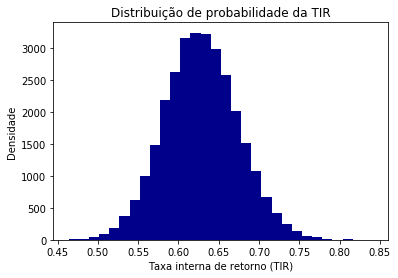

In [76]:
warnings.filterwarnings('ignore')

tir_dist_f = [j for j in tir_dist if str(j)!= 'nan']

print("devio padrão: ", stdev(tir_dist_f))
print("média: ", mean(tir_dist_f))
print("mediana: ", median(tir_dist_f))

plt.hist(tir_dist_f, bins=30, color='darkblue')
plt.xlabel('Taxa interna de retorno (TIR)')
plt.ylabel('Densidade')
plt.title('Distribuição de probabilidade da TIR')
plt.show()